What You Will Learn
Skills in cleaning, integrating, and exploring data using Python.
Proficiency in using Pandas for complex data manipulation and statistical analysis.
Differentiating between unstructured and structured data and their implications in data analysis.


Instructions
Download and import the Data Science Job Salary dataset.
Identify and differentiate between structured and unstructured data within the dataset, and discuss how this impacts your analysis approach.
Preprocess the data by handling missing values and removing duplicates if needed.
Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.
Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.


**Answers**

Of all the columns, I'd say the job title is closest to being unstructured because these are subjective job titles, and one worker may call themselves data analyst while another calls themselves data scientist, etc...

There are no missing values as far as I can tell. See ds_df.isna().sum() below. I did find seemingly a duplicate, a Data Scientist earning 76,760 EUR. I'm not confident that this truly a duplicate, but just to demonstrate my programming skills, I dropped it.

I graphed the median and mean by experience level. When you see the progression for median growth, it seems more or less steady from one level to another. When you look at average however there's a relatively small jump for entry level to middle, a bigger jump from middle to senior, and a large jump to executive. This indicates a small number of senior and executives have a much higher salary than the rest of the pack.

In [26]:
import pandas as pd

ds_data = pd.read_csv('/content/Data Science Jobs Salaries.csv')

ds_df = pd.DataFrame(ds_data)
ds_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [27]:
ds_df['work_year'] = ds_df['work_year'].str.replace('e','')
ds_df['work_year'].value_counts()

2021    179
2020     66
Name: work_year, dtype: int64

In [28]:
ds_df.isna().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [29]:
ds_df[ds_df.duplicated(keep=False)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
151,2021,MI,FT,Data Scientist,76760,EUR,91500,DE,50,DE,L
198,2021,MI,FT,Data Scientist,76760,EUR,91500,DE,50,DE,L


In [30]:
ds_df.drop(198, inplace=True)

In [31]:
ds_df.iloc[198]

work_year                       2020
experience_level                  EN
employment_type                   PT
job_title             Data Scientist
salary                         19000
salary_currency                  EUR
salary_in_usd                  21669
employee_residence                IT
remote_ratio                      50
company_location                  IT
company_size                       S
Name: 199, dtype: object

In [75]:
median_grouping = ds_df.groupby('experience_level')['salary_in_usd'].median()
mean_grouping = ds_df.groupby('experience_level')['salary_in_usd'].mean()

In [80]:
median_grouping

experience_level
EN     58800.5
EX    154963.0
MI     72812.5
SE    120000.0
Name: salary_in_usd, dtype: float64

In [76]:
mean_grouping


experience_level
EN     59753.462963
EX    226288.000000
MI     85681.647059
SE    128841.298701
Name: salary_in_usd, dtype: float64

In [83]:
ratio = median_grouping/mean_grouping


In [101]:
combined_df = pd.concat([median_grouping, mean_grouping, ratio], axis=1) #asked chatgpt!
combined_df.columns = ['Median', 'Mean', 'Median_to_Mean_Ratio']


In [103]:
combined_df.reset_index(inplace=True)

In [106]:
combined_df = combined_df.set_index('experience_level').loc[['EN', 'MI', 'SE','EX']].reset_index()
combined_df

,experience_level,Median,Mean,Median_to_Mean_Ratio
0,EN,58800.5,59753.462963,0.984052
1,MI,72812.5,85681.647059,0.849803
2,SE,120000.0,128841.298701,0.931378
3,EX,154963.0,226288.000000,0.684804


Text(0.5, 1.0, 'Median by experience level')

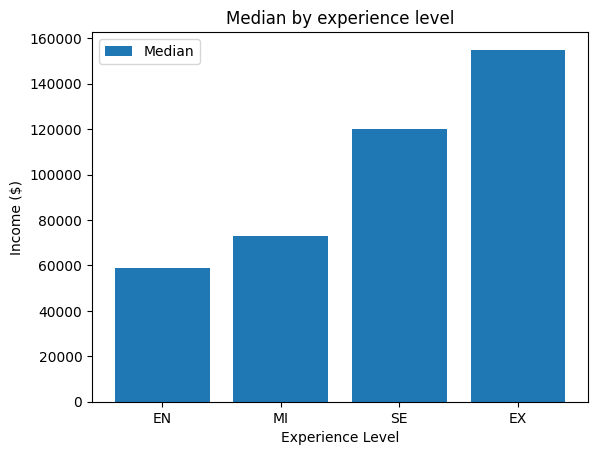

In [113]:
import matplotlib.pyplot as plt

plt.bar(combined_df['experience_level'], combined_df['Median'], label='Median')
plt.xlabel('Experience Level')
plt.ylabel('Income ($)')
plt.legend()
plt.title('Median by experience level')


Text(0.5, 1.0, 'Mean by experience level')

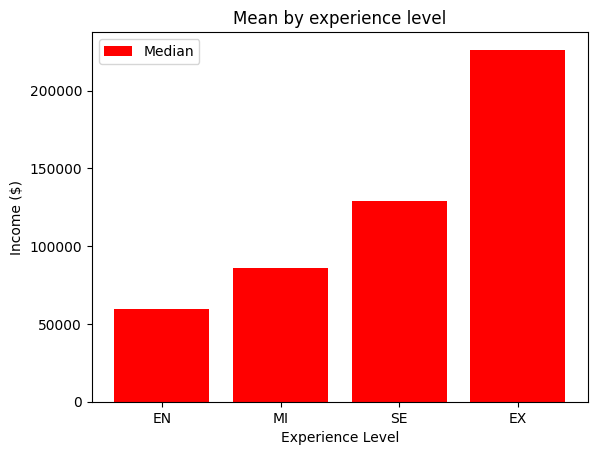

In [118]:
plt.bar(combined_df['experience_level'], combined_df['Mean'], label='Median', color='red')
plt.xlabel('Experience Level')
plt.ylabel('Income ($)')
plt.legend()
plt.title('Mean by experience level')
